In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})

In [4]:
df = pd.read_csv('data/blogtext.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [6]:
df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [7]:
topics = df.topic.value_counts().index
print(list(topics), '\n\n Всего уникальных тем:', len(topics));

['indUnk', 'Student', 'Technology', 'Arts', 'Education', 'Communications-Media', 'Internet', 'Non-Profit', 'Engineering', 'Law', 'Publishing', 'Science', 'Government', 'Consulting', 'Religion', 'Fashion', 'Marketing', 'Advertising', 'BusinessServices', 'Banking', 'Chemicals', 'Telecommunications', 'Accounting', 'Military', 'Museums-Libraries', 'Sports-Recreation', 'HumanResources', 'RealEstate', 'Transportation', 'Manufacturing', 'Biotech', 'Tourism', 'LawEnforcement-Security', 'Architecture', 'InvestmentBanking', 'Automotive', 'Agriculture', 'Construction', 'Environment', 'Maritime'] 

 Всего уникальных тем: 40


## Распределение по темам

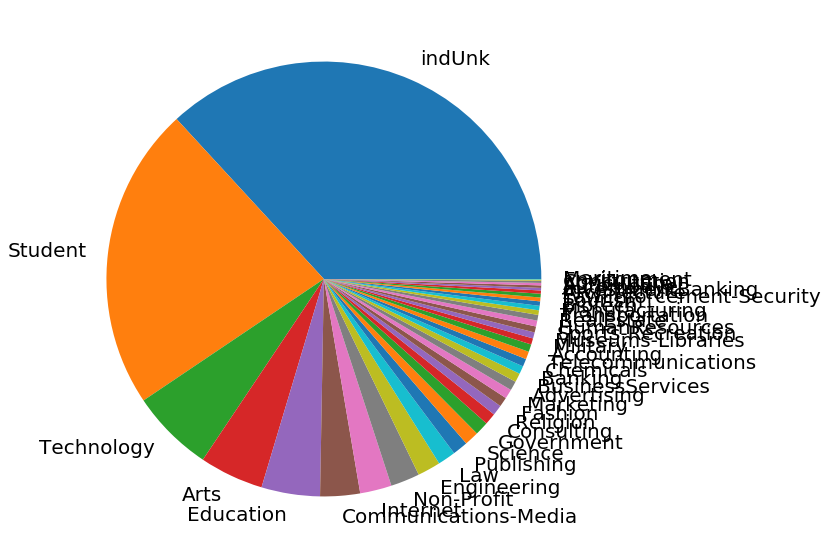

In [8]:
plt.figure(figsize=(10,10))
plt.pie(df.topic.value_counts(), labels=topics);

## Исследуем отдельно тексты из темы <<Искусство>>

In [9]:
data = df[ df.topic == 'Arts']

In [10]:
data.shape

(32449, 7)

## Распределение м/ж

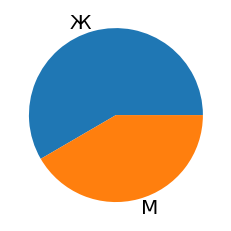

In [11]:
plt.pie(data.gender.value_counts(), labels=['Ж', 'М']);

## Распределение по возрастам

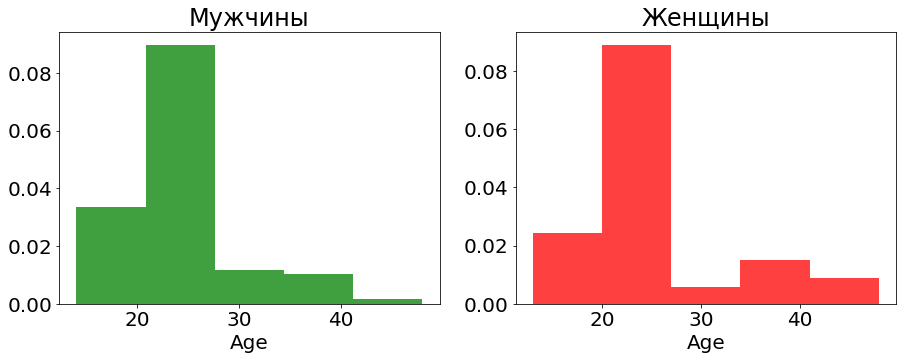

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Мужчины')
plt.hist(data.age[data.gender=='male'],color='green', bins = 5, density=True, alpha=0.75)
plt.xlabel('Age')

plt.subplot(122)
plt.title('Женщины')
plt.hist(data.age[data.gender=='female'],color='red', bins = 5, density=True, alpha=0.75)
plt.xlabel('Age')
plt.show()

## Подгрузим стоп-слова из файлика (только английский и русский языки)

In [2]:
file = open("stopwords/eng_rus.txt", "r")
stopwords_eng_rus = [line[:-1] for line in file]

In [3]:
stopwords_eng_rus[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

## Почистим тексты: оставим только буквы и цифры (все слова в нижнем регистре, стоп-слова удалены)

In [15]:
%%time

def Cleaner(string):
    string = string.lower()
    string = re.sub(r"\s+" ," ", re.sub(r"[^0-9a-zа-яё]", " ", string))

    string = string.split(' ')
    tokens = []
    for word in string:
        if (word in stopwords_eng_rus) or word=='':
            continue
        else: 
            tokens.append(word)     
        
    return tokens

data['text_tokens'] = data['text'].map(lambda x: Cleaner(x))

CPU times: user 56.6 s, sys: 383 ms, total: 57 s
Wall time: 57.4 s


/home/pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [16]:
data.text_tokens.head(7)

997     [current, music, could, magic, donna, summer, ...
998     [hey, one, many, things, expression, zone, hop...
3980    [weekend, great, sat, celebrated, nicole, grad...
3981    [time, 3, 11, pm, m, still, work, blog, good, ...
3982    [minus, 4, hours, 3, mins, 12, sec, till, gym,...
3983    [whatchu, mean, scared, picture, taken, carlen...
3984    [know, know, re, probably, thinking, isn, sonn...
Name: text_tokens, dtype: object

### Посчитаем сколько всего токенов в текстах:

In [17]:
data.text_tokens.map(lambda x: len(x)).sum()

3641331

### Посмотрим на распределние длины текстов:

In [18]:
data['length'] = data.text_tokens.map(lambda x: len(x)).astype('int')

/home/pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


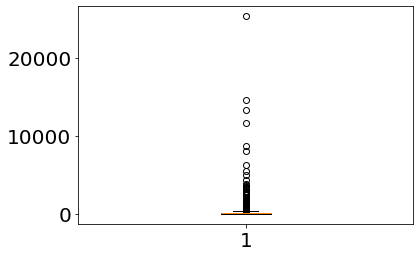

In [19]:
plt.boxplot(data.length);
#какие-то очень длинные тексты?

In [20]:
data.length.describe()

count    32449.000000
mean       112.217048
std        264.559281
min          0.000000
25%         20.000000
50%         61.000000
75%        138.000000
max      25369.000000
Name: length, dtype: float64

### откинем всё, что больше 200 

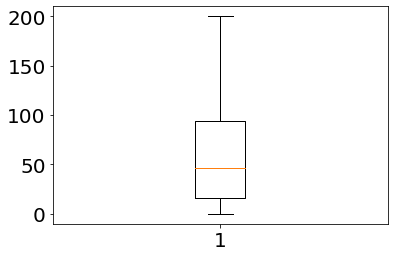

In [21]:
data = data[data.length <= 200]
plt.boxplot(data.length);

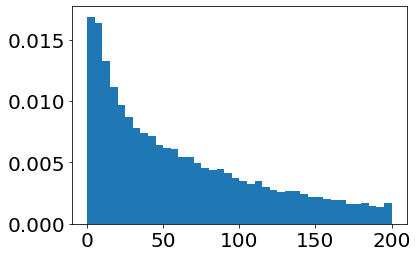

In [22]:
plt.hist(data.length, density=True, bins=40);
#плотность распредления по кол-ву токенов убывает экспоненциально

### TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(data.text_tokens.astype('str'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [24]:
dictionary = tfidf_vectorizer.get_feature_names()

In [25]:
transformed_weights = tfidf_vectorizer.transform(
                                        data.text_tokens.astype('str')
                                                    )

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': dictionary, 'weight': weights})

In [26]:
weights_df.sort_values(by='weight', ascending=False).head(20)
#дополнительно увидел, что нужно в стоп-слова добавить urllink, nbsp

,word,weight
37440,like,0.019526
44943,one,0.016423
35902,know,0.015538
27005,get,0.015132
63442,think,0.013984
63856,time,0.013914
51694,really,0.013576
27499,go,0.013323
27655,good,0.012990
27585,going,0.012166


## видно, что в случае темы <<искусство>> люди куда-то сходили, что-то увидели, задумались и выразили свое отношение: понравилось, заставило почувствовать и т. д.

In [130]:
#!pip install wordcloud

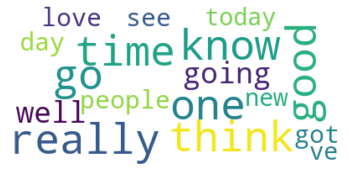

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors 

text = ' '.join(weights_df.sort_values(by='weight', ascending=False).word.values[0:20])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Время word2vec

In [28]:
#!pip install gensim

from gensim.models import Word2Vec

In [29]:
w2v = Word2Vec(data.text_tokens.values, min_count=5, size=150, iter=10)
word_vectors = w2v.wv
len(word_vectors.vocab)

20879

## Посмотрим на адекватность полученных результатов

In [30]:
word_vectors.most_similar(['picture'])

[('photo', 0.6673987507820129),
 ('camera', 0.6294779777526855),
 ('pictures', 0.624542772769928),
 ('photos', 0.6047385931015015),
 ('pic', 0.5835741758346558),
 ('link', 0.5600839853286743),
 ('cam', 0.5468931794166565),
 ('pics', 0.516898512840271),
 ('heres', 0.4817689061164856),
 ('portrait', 0.4797833561897278)]

In [31]:
word_vectors.most_similar(['music'])

[('songs', 0.6666510105133057),
 ('guitar', 0.657865583896637),
 ('musical', 0.6491626501083374),
 ('drums', 0.631311297416687),
 ('bands', 0.6213686466217041),
 ('instrument', 0.621227502822876),
 ('classical', 0.5983749628067017),
 ('jazz', 0.5945117473602295),
 ('listening', 0.5906175374984741),
 ('techno', 0.5859600305557251)]

## Понизим размерность с помощью TSNE

In [32]:
from sklearn.manifold import TSNE

In [33]:
dictionary = list(word_vectors.vocab.keys())

In [34]:
X_embedded = TSNE(n_components=2).fit_transform(
                                word_vectors[dictionary]
                                                )

## Чтобы не визуализировать всё, возьмем лишь небольшой квадратик

In [42]:
xs, ys, m = [], [], []
for i in range(len(X_embedded)):
    if (X_embedded[i][0])>1 and (X_embedded[i][0])<3 and abs(X_embedded[i][1])<1 :
        xs.append(X_embedded[i][0])
        ys.append(X_embedded[i][1])
        m.append(dictionary[i])

In [36]:
len(m)

58

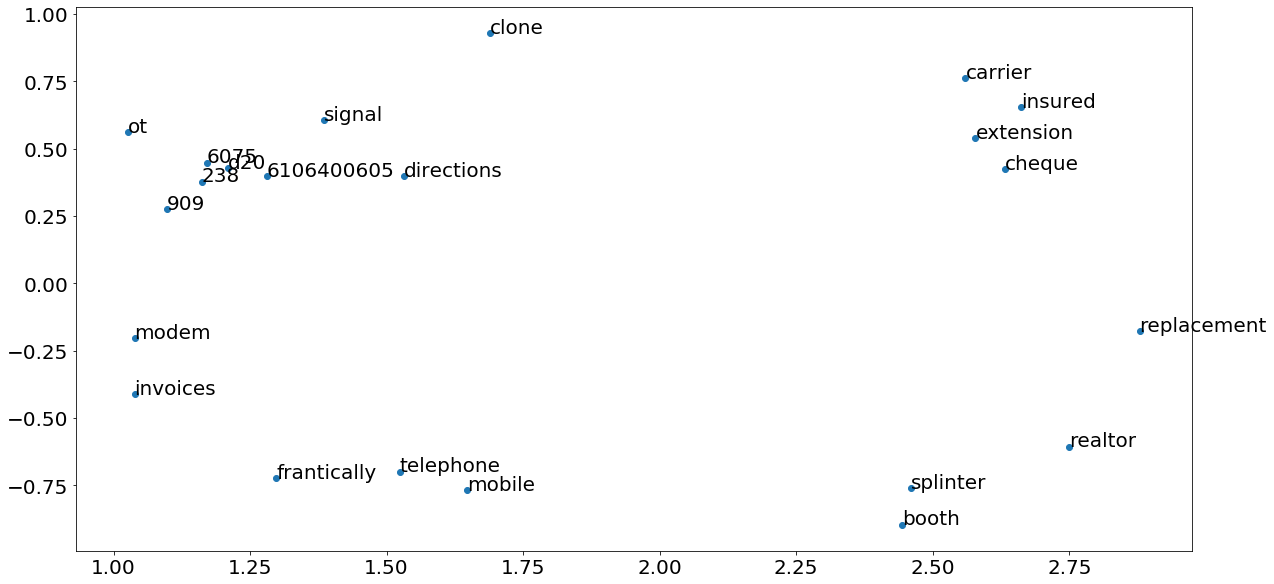

In [43]:
plt.figure(figsize=(20,10))
plt.scatter(xs, ys)

for x, y, label in zip(xs, ys, m):
    plt.annotate(label, xy=(x,y))

In [44]:
#слова телефон и мобильный оказались рядом